### 13.1 Choose The best Machine Learning Model
When you work on a machine learning project, you often end up with multiple good models to choose from. 
Using resampling methods like cross validation, you can get an estimate for how accurate each model may be on unseen data. 
When you have a new dataset, it is a good idea to visualize the data using di↵erent techniques in order to look at the data from different perspectives. 
The same idea applies to model selection. You should use a number of di↵erent ways of looking at the estimated accuracy of your machine learning algorithms in order to choose the one or two algorithm to finalize. A way to do this is to use visualization methods to show the average accuracy, variance and other properties of the distribution of model accuracies. 

### 13.2 Compare Machine Learning Algorithms Consistently

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. 

In [8]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
# load dataset
url = "http://ftp.ics.uci.edu/pub/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names=["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"] 
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [10]:
# prepare configuration for cross validation test harness
num_folds = 10
num_instances = len(X)
seed = 7

In [11]:
# prepare models
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))

In [12]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds, random_state=seed) 
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.691285 (0.062716)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


The example also provides a box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

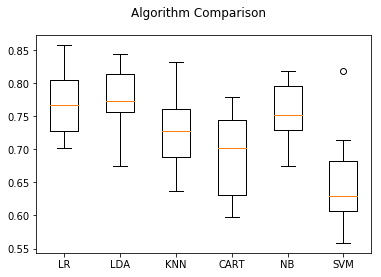

In [14]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


From these results, it would suggest that both logistic regression and linear discriminant analysis are perhaps worthy of further study on this problem.